<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Linear-Regression,-a.k.a-Ordinary-Least-Square-(OLS)" data-toc-modified-id="Linear-Regression,-a.k.a-Ordinary-Least-Square-(OLS)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear Regression, a.k.a Ordinary Least Square (OLS)</a></span><ul class="toc-item"><li><span><a href="#$argmin_{\hat{\textbf{w}}}-||\textbf{X}\hat{\textbf{w}}---\textbf{y}||_2^2$-closed-form-solution" data-toc-modified-id="$argmin_{\hat{\textbf{w}}}-||\textbf{X}\hat{\textbf{w}}---\textbf{y}||_2^2$-closed-form-solution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$argmin_{\hat{\textbf{w}}} ||\textbf{X}\hat{\textbf{w}} - \textbf{y}||_2^2$ closed form solution</a></span></li><li><span><a href="#Linear-Regression-In-Action" data-toc-modified-id="Linear-Regression-In-Action-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression In Action</a></span></li><li><span><a href="#Coefficient-of-determination:-$r^2$" data-toc-modified-id="Coefficient-of-determination:-$r^2$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Coefficient of determination: $r^2$</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#sklearn-for-linear-regression" data-toc-modified-id="sklearn-for-linear-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>sklearn</code> for linear regression</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

# Regression

Given 13 columns of data, the revenue of different geological areas, the ratio of the number of teachers and students, and the median house price, let's predict the house prices of an area.
* Define the model as a function <br><br>
  The input is $\textbf{X}$ of $m$ number of areas, represented by a $m\times 13$ matrix <br><br>
  The output is the median house price of $m$ number of areas $\textbf{y}$, represented by a vector of $m$ length: <br><br>
<br><br>
   \begin{equation}
   f(\textbf{X}):=\{\textbf{X} \mapsto \textbf{y} \}\\
   \textbf{X} \in \mathbb{R}^{m\times 13},
   \textbf{y} \in \mathbb{R}^m
   \end{equation}
<br><br>
<br><br>

* Assuming $\textbf{y}$ is the true median of $m$ number of house price, the predicted median house prices are $f(\textbf{X}_i), i = 1,2,...,m$ we are going to narrow the difference of them. 
<br><br>
     \begin{equation}
      \epsilon = |\textbf{y} - f(\textbf{X})| = \sum_{i=1}^{m} |\textbf{y} - f(\textbf{X})|
     \end{equation}
<br><br>
* Optimization: we want to find the model with lowest error $f$
<br><br>
 \begin{equation}
     f = argmin(\epsilon) = argmin \sum_{i=1}^{m} |\textbf{y} - f(\textbf{X})|
 \end{equation}
 <br><br>
<br>
* However, due to the fact that optimizing $|\textbf{u}|$ will not give closed form solution, we usually turn to optimize $||\textbf{u}||_2$. i.e.
<br><br>
 \begin{equation}
     f = argmin \sum_{i=1}^{m} ||\textbf{y} - f(\textbf{X})||_2
 \end{equation}
 <br><br>
<br>

# Linear Regression, a.k.a Ordinary Least Square (OLS) 

<br><br>
 \begin{equation}
     \mathbf{y} = \mathbf{w}_{0} * \underbrace{[1,...,1]}_{m} + \mathbf{w}_1*\mathbf{X}_{:,1} + \mathbf{w}_2*\mathbf{X}_{:,2} + ... + \mathbf{w}_n*\mathbf{X}_{:,n}\\
     \mathbf{y} = (\underbrace{[1,...,1]^T}_{m} | \mathbf{X} ) \mathbf{w}\\
     \text{where }\mathbf{X} \in \mathbb{R}^{m\times n}, \mathbf{y} \in \mathbb{R}^m, \mathbf{w} \in \mathbb{R}^{n+1}\\
     \quad\\
     \text{note } (\mathbf{A} | \mathbf{B}) \text{is known as augmentation, you may see it as column stack}\\
     \text{hence } (\underbrace{[1,...,1]^T}_{m} | \mathbf{X} ) \in \mathbb{R}^{m\times (n+1)}
 \end{equation}
 <br><br>
<br>
more on matrix augmentation<br>
https://en.wikipedia.org/wiki/Augmented_matrix

In [1]:
import numpy as np
X = np.array([[1, 5], [3, 2], [6, 1]])
y = np.array([2, 3, 4])
w = np.array([2.4285714285714288, 0.28571429, -0.14285714])

ones = np.ones(X.shape[0])
augX = np.column_stack([ones, X])
y_pred = augX.dot(w)
np.isclose(y, y_pred)

array([ True,  True,  True])

note:

`numpy.ndarray.dot(b, out=None)`

Dot product of two arrays.<br>

<br>

Equivalent function


`numpy.dot(a, b, out=None)`

Dot product of two arrays.

For 2-D arrays it is equivalent to matrix multiplication, and for 1-D arrays to inner product of vectors (without complex conjugation). For N dimensions it is a sum product over the last axis of a and the second-to-last of b:

## $argmin_{\hat{\textbf{w}}} ||\textbf{X}\hat{\textbf{w}} - \textbf{y}||_2^2$ closed form solution

Note, for convenience, the following $\textbf{X}$ represent the above mentioned $(\underbrace{[1,...,1]^T}_{m} | \textbf{X} )$ <br>

<br>We aims to find a $\textbf{w}$ which allows the model to fit perfectly<br>

Assuming an existing $\hat{\textbf{w}}$ meets $\textbf{X}\hat{\textbf{w}}\approx \textbf{y}$, the degree of fitting can be expressed as $||\textbf{X}\hat{\textbf{w}} - \textbf{y}||_2^2$, thus $\hat{\textbf{w}}$ can be expressed by:<br>

<br><br>
 \begin{equation}
     \hat{\textbf{w}} = argmin(J(\hat{\textbf{w}}))     = argmin ||\textbf{X}\hat{\textbf{w}} - \textbf{y}||_2^2
 \end{equation}
 <br><br>
<br>
$argmin_{\hat{\textbf{w}}} ||\textbf{X}\hat{\textbf{w}} - \textbf{y}||_2^2$ has an closed form solution:
<br><br>
 \begin{equation}
     \hat{\textbf{w}} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}
 \end{equation}
 <br><br>
<br>

About closed form solution: <br>
http://mathworld.wolfram.com/Closed-FormSolution.html <br>
https://stats.stackexchange.com/questions/70848/what-does-a-closed-form-solution-mean <br>

<br>
About the closed form solution of the optimization problem above: <br>
https://mathoverflow.net/questions/152312/closed-form-solution-for-least-squares-problem <br>


1. Complete the function `fit`, using `X_train, y_train` to calculate $\hat{\textbf{w}}$, and update $\hat{\textbf{w}}$ to the class attribute `self.w`  <br>
<br>
2. Complete the function `predict`, using the class attribute `w`, i.e. `self.w`, then $\textbf{y}_{pred} = \textbf{X}_{test}\hat{\textbf{w}}$ to obtain the output `y_pred` <br>
<br>
3. Calculate $\textbf{A}^{-1}$ by `np.linalg.inv` <br>
  

`numpy.linalg.inv(a)`
Compute the (multiplicative) inverse of a matrix.

Given a square matrix `a`, return the matrix `ainv` satisfying `dot(a, ainv) = dot(ainv, a) = eye(a.shape[0])`.

Parameters:	
`a` : (..., M, M) array_like
Matrix to be inverted.
Returns:	
`ainv` : (..., M, M) ndarray or matrix
(Multiplicative) inverse of the matrix a.
Raises:	
`LinAlgError`
If a is not square or inversion fails.
<br>

In [26]:
import numpy as np

class MyLinearRegression:
    def __init__(self):
        self.w = None
    
    # static method is irrelavent to instances therefore it does not need self
    @staticmethod
    def ones_augment_to_left(X):
        X = np.array(X)
        ones = np.ones(X.shape[0])
        # column_stack stacks two vectors and/or matrices together as columns
        return np.column_stack([ones, X])
    
    @staticmethod
    def closedFormSolution(X, y):
        cov_inv = np.linalg.inv(X.T.dot(X))
        w = cov_inv.dot(X.T).dot(y)
        return w
    
    def fit(self, X_train, y_train):
        X = self.ones_augment_to_left(X_train)
        y = np.array(y_train)
        self.w = MyLinearRegression.closedFormSolution(X, y)
        return self

    def predict(self, X_test):
        X_test = np.array(X_test)
        X = self.ones_augment_to_left(X_test)
        return np.dot(X, self.w)

assume ```X``` represents the sample matrix of 4 samples and 2 variables

In [8]:
X = np.array(np.arange(8).reshape(4,2))
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

augment a column of 1s to ```X```'s left

In [11]:
augX = MyLinearRegression.ones_augment_to_left(X)

In [ ]:
w -=

In [20]:
vector = augX.dot([1, 1, 1])
vector

array([ 2.,  6., 10., 14.])

In [21]:
vector.T

array([ 2.,  6., 10., 14.])

In [22]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [23]:
X.T

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

In [17]:
np.array([vector]).T

(4, 1)

In [19]:
augX.dot([1, 1, 1])

array([ 2.,  6., 10., 14.])

In [6]:
mlr = MyLinearRegression()
mlr.ones_augment_to_left(X)

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.]])

In [16]:
import numpy as np


class MyLinearRegression:
    def __init__(self):
        self.w = None

    @staticmethod
    def ones_augment_to_left(X):
        X = np.array(X)
        ones = np.ones(X.shape[0])
        return np.column_stack([ones, X])

    def fit(self, X_train, y_train):
        X = self.ones_augment_to_left(X_train)
        y = np.array(y_train)
        product = np.dot(X.T, X)
        theInverse = np.linalg.inv(product)
        self.w = np.dot(np.dot(theInverse, X.T), y)
        return self

    def predict(self, X_test):
        X_test = np.array(X_test)
        return self.ones_augment_to_left(X_test).dot(self.w)

    def predict_alternative(self, X_test):
        predictions = []
        for i in X_test:
            components = self.w[1:] * i
            predictions.append(sum(components) + self.w[0])
        return predictions

In [17]:
# Test
import numpy as np

mlr = MyLinearRegression()

X = [[1, 5], [3, 2], [6, 1]]
y = [2, 3, 4]
y_pred = mlr.fit(X, y).predict(X)
print('Am I correct? \n', np.isclose(y, y_pred).all())

'''
If correct, you will get:
Am I correct? 
 True
'''

Am I correct? 
 True


'\nIf correct, you will get:\nAm I correct? \n True\n'

In [18]:
mlr = MyLinearRegression()
('type of mlr = {}, '
+ 'is mlr an instance of MyLinearRegression? {}'
+ 'signatire of mlr: {}').format(
    type(mlr), 
    isinstance(mlr, MyLinearRegression),
    mlr)

"type of mlr = <class '__main__.MyLinearRegression'>, is mlr an instance of MyLinearRegression? Truesignatire of mlr: <__main__.MyLinearRegression object at 0x0000026123DA8688>"

In [19]:
X = [[1, 5], [3, 2], [6, 1]]
y = [2, 3, 4]
fitted_mlr = mlr.fit(X, y)

('type of fitted_mlr = {}, '
+ 'is fitted_mlr an instance of MyLinearRegression? {}'
+ 'signatire of fitted_mlr: {}').format(
    type(fitted_mlr), 
    isinstance(fitted_mlr, MyLinearRegression),
    fitted_mlr)

"type of fitted_mlr = <class '__main__.MyLinearRegression'>, is fitted_mlr an instance of MyLinearRegression? Truesignatire of fitted_mlr: <__main__.MyLinearRegression object at 0x0000026123DA8688>"

In [29]:
mlr.fit(X, y)
mlr.w

array([ 2.42857143,  0.28571429, -0.14285714])

In [34]:
mlr.predict(X)

array([2., 3., 4.])

In [33]:
w = mlr.w
for x1, x2 in X:
    pred = w[0] + x1 * w[1] + x2 * w[2]
    print(pred)

1.9999999999999911
2.999999999999993
4.0000000000000036


## Linear Regression In Action

Effective linear regression has four requirements:

1. depdent/target variable $\mathbf{y}$ 和 independent variables $\mathbf{X}_{:,1}, ..., \mathbf{X}_{:,n}$ meet linear relationship, independent variables are independent to each other.

1. There is no asociation among residuals

1. The variance of error of around regression line is very small or close to zero (homoscedasticity)

1. Residuals are normal distributed, if the restriction relaxes, we can say the histogram of residuals forms a bell shape.

Additional readings:

http://people.duke.edu/~rnau/testing.htm <br>

http://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-are-the-four-assumptions-of-linear-regression/

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset

diabetes = datasets.load_diabetes()
columns = ['age', 'sex', 'body mass index', 
           'average blood pressure', 
           'blood serum tc', 'blood serum ldl', 'blood serum hdl', 
           'blood serum tch', 'blood serum ltg', 'blood serum glu', 
           'response']

# more at: http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf

df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']], 
                  columns=columns)
print(columns)
sns.pairplot(df, size=3, diag_kind='hist')
plt.show()

['age', 'sex', 'body mass index', 'average blood pressure', 'blood serum tc', 'blood serum ldl', 'blood serum hdl', 'blood serum tch', 'blood serum ltg', 'blood serum glu', 'response']


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3300x3300 with 132 Axes>

In [21]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Create linear regression object
mlr2 = MyLinearRegression()

# Train the model using the training sets
mlr2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = mlr2.predict(X_test)

# The coefficients
w = mlr2.w
print('w: \n', w)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score (r squared, r^2): '
      +'%.2f' % r2_score(y_test, y_pred))

w: 
 [ 150.4339752    32.14567288 -242.82582016  559.98738213  407.64166457
 -718.68703857  396.63010925   10.42304776  171.81177553  627.07976426
  -21.62420711]
Mean squared error: 2817.80
Variance score (r squared, r^2): 0.51


## Coefficient of determination: $r^2$ 

`sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')`

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In statistics, we measure the proportion of the variance in the dependent variable that is predictable from the independent variable(s) to determine the model explainatory power. <br>

As for simple linear regression, Coefficient of determination is the square of the sample correlation coefficient. <br>

Source:<br> 
https://www.wikiwand.com/en/Coefficient_of_determination <br> 


Additional Readings:<br>
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

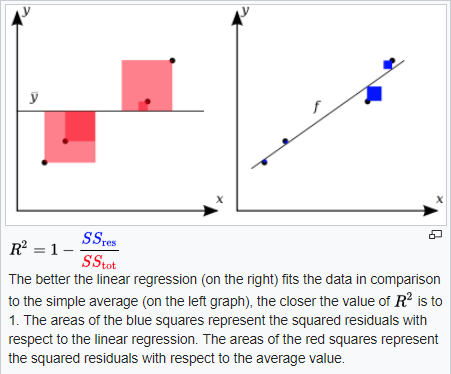

Assuming a dataset includes $y_1, ... , y_n$ n observations in total, the predicted values are $f_1, ..., f_n$. We define the residuals as  $e_i = y_i-f_i$ <br>

<br> The average observation is  $ \bar{y} = \frac{1}{n} \sum^n_{i=1} y_i$. <br>

<br> The total sum of square is $SS_{tot} = \sum_i(y_i - \bar{y}) ^2 $ <br>

<br> The sum of square of regression is $SS_{reg} = \sum_i(f_i - \bar{y}) ^2 $ <br>

<br> The sum of square of residuals is $SS_{res} = \sum_i(y_i - f_i) ^2  = \sum_i e_i^2$ <br>

<br> Therefore the coefficient of determination can be defined as $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$<br>


In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def ssRes(y_true, y_pred):
    error = np.array(y_true) - np.array(y_pred)
    return np.sum(error ** 2)

def ssTot(y_true):
    mean = np.mean(y_true)
    dev = np.array(y_true) - mean
    return np.sum(dev ** 2)

def rSqured(y_test, y_pred):
    return 1 - ssRes(y_test, y_pred) / ssTot(y_test)

def meanSquaredError(y_true, y_pred):
    return ssRes(y_true, y_pred) / len(y_true)

def variance(y_true):
    return ssTot(y_true) / len(y_true)

ssres = ssRes(y_test, y_pred)
sstol = ssTot(y_test)
r2 = rSqured(y_test, y_pred)
print('ssRes={:.2f}, ssTot={:.2f}, r^2={:.4f}'.format(ssres, sstol, r2))

assert np.isclose(variance(y_test), np.var(y_test))
assert np.isclose(meanSquaredError(y_test, y_pred), mean_squared_error(y_test, y_pred))
assert np.isclose(rSqured(y_test, y_pred), r2_score(y_test, y_pred))
print('my implementation is correct')

ssRes=411399.03, ssTot=840267.95, r^2=0.5104
my implementation is correct


Alternatively:

$r^2 = 1 - \dfrac{mse(\mathbf{y}, \mathbf{f})}{var(\mathbf{y})}$ 

And $r$ is Pearson correlation coefficient https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [47]:
np.isclose(rSqured(y_test, y_pred), 
           1 - meanSquaredError(y_test, y_pred)/variance(y_test))

True

In [49]:
from scipy.stats import pearsonr
#pearsonr?
('Pearson correlation coefficient: {}, '
+'p-value for testing non-correlation: {}').format(
    *pearsonr(y_test, y_pred))

'Pearson correlation coefficient: 0.7180277222230189, p-value for testing non-correlation: 1.995929933373795e-24'

In [50]:
pearsonr(y_test, y_pred)[0] ** 2

0.5155638098807768

In [51]:
X_train.shape

(296, 10)

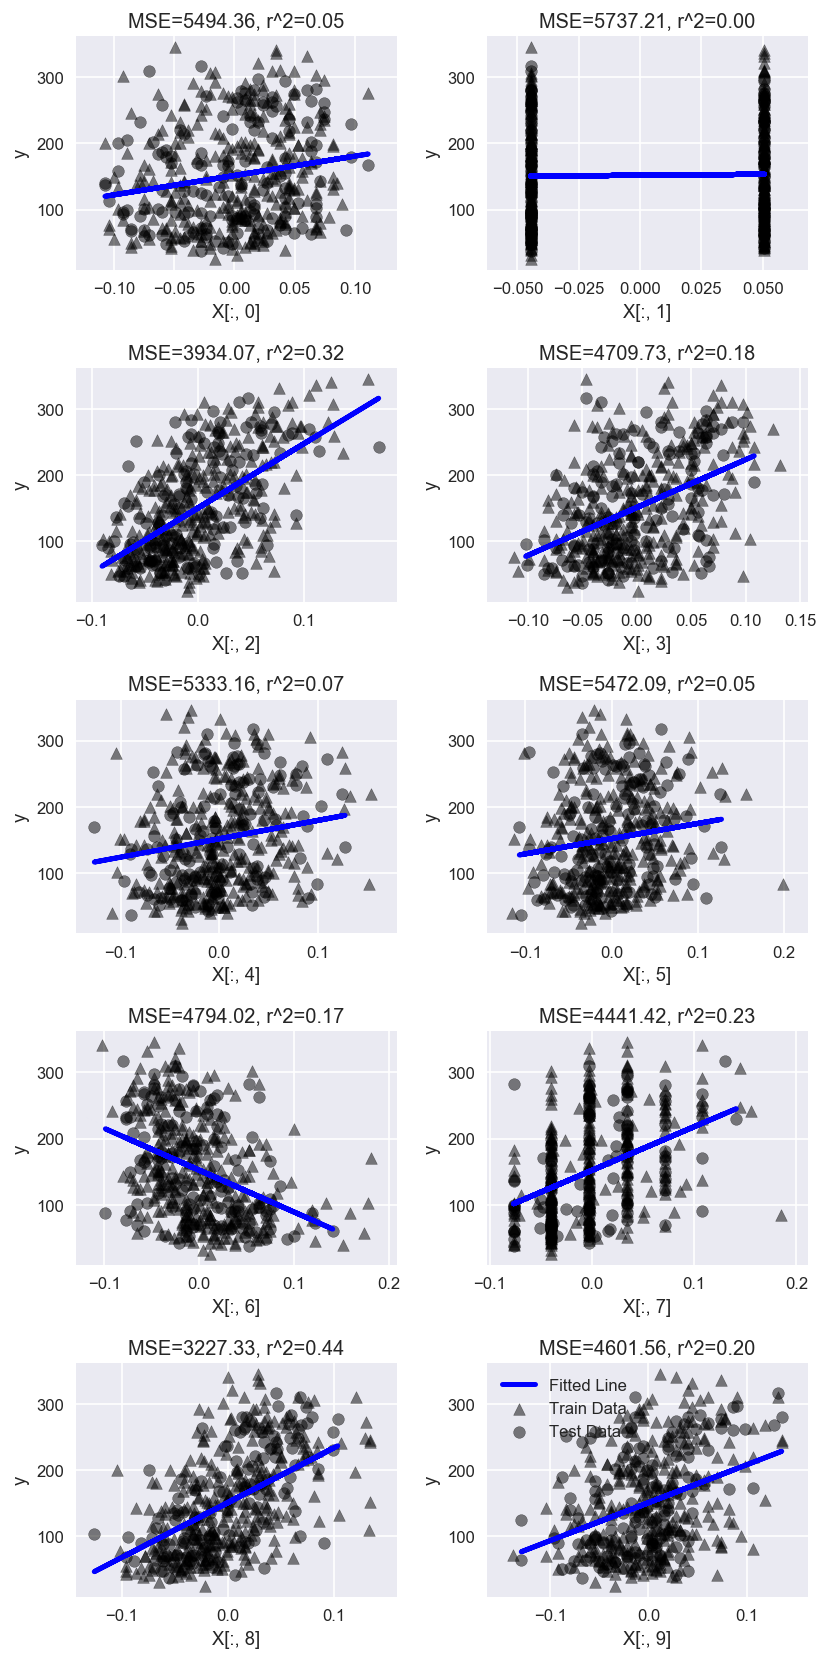

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,14), dpi=120)

for i in range(X_train.shape[1]):
    y_pred3 = MyLinearRegression().fit(
        X_train[:, i], y_train).predict(
        X_test[:, i])
    # ax refers to a subplot
    # the index of as starts from 1 instead 0
    ax = fig.add_subplot(5, 2, i + 1)
    
    ax.set_xlabel('X[:, %d]' % i)
    
    ax.set_ylabel('y')
    
    ax.scatter(X_train[:, i], y_train, 
               color='black', marker='^', 
               alpha=0.5, label='Train Data')
    
    ax.scatter(X_test[:, i], y_test, 
               color='black', 
               alpha=0.5, label='Test Data')
    
    ax.plot(X_test[:, i], y_pred3, 
            color='blue', 
            linewidth=3, label='Fitted Line')
    
    ax.set_title('MSE=%.2f, r^2=%.2f'% (
                mean_squared_error(y_test, y_pred3), 
                r2_score(y_test, y_pred3)
                )
            )

fig.tight_layout()
plt.legend()
plt.show()

## Residuals

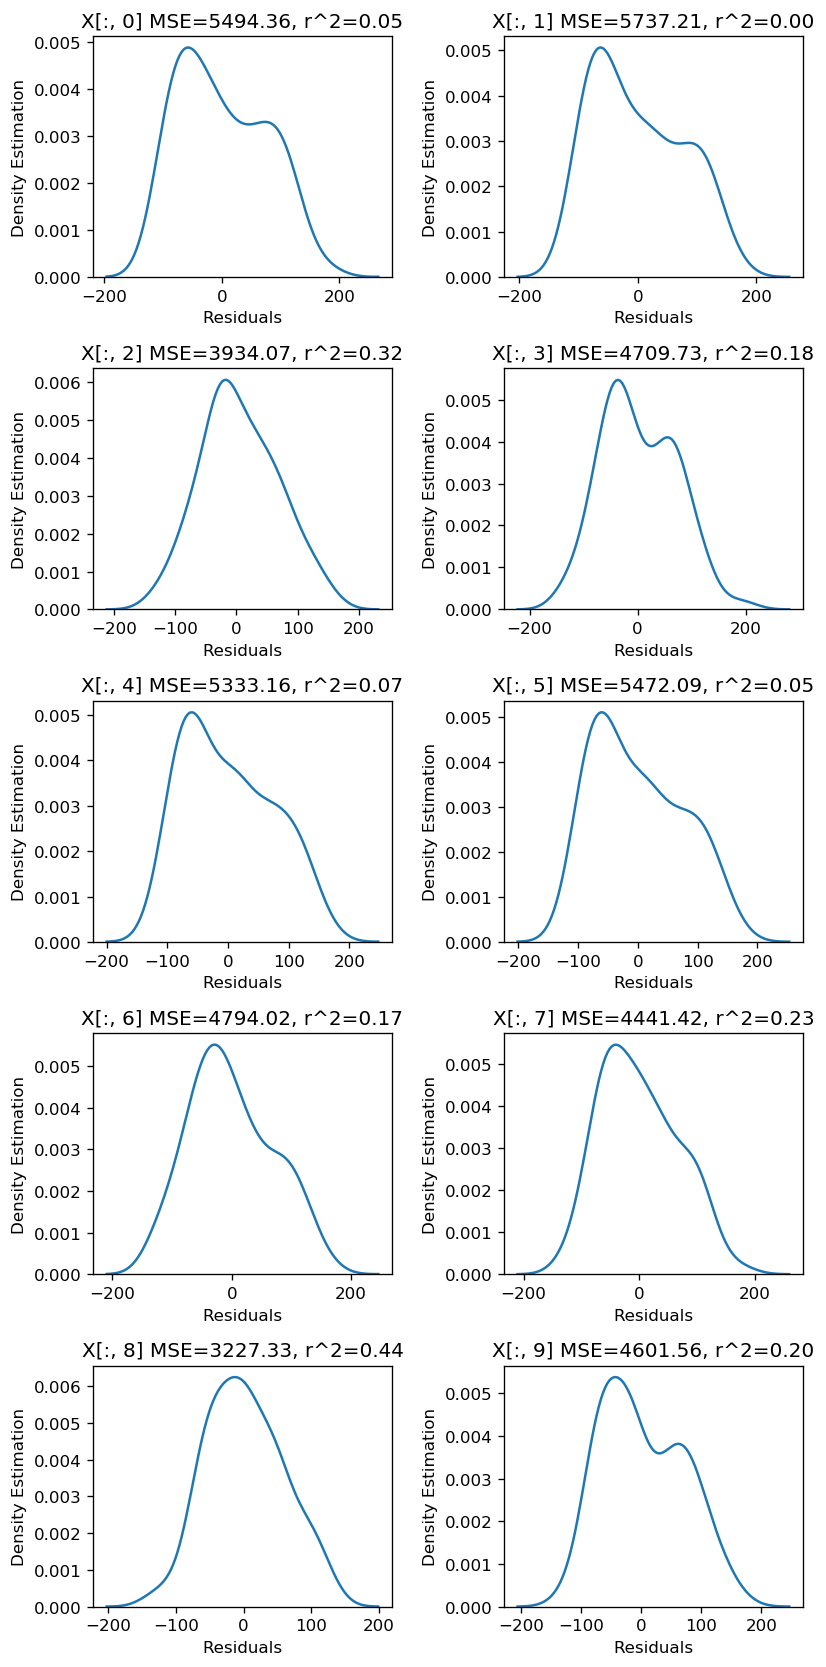

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# similar to add_subplot, but creates all axes once
fig, axes = plt.subplots(5, 2, figsize=(7,14), dpi=120)
for i, ax in enumerate(np.ravel(axes)):
    y_pred3 = MyLinearRegression().fit(
        X_train[:, i], y_train).predict(
        X_test[:, i])
    sns.kdeplot(y_test - y_pred3, ax=ax)
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Density Estimation')
    ax.set_title('X[:, %d] MSE=%.2f, r^2=%.2f'% (
                i,
                mean_squared_error(y_test, y_pred3), 
                r2_score(y_test, y_pred3)
                )
            )
fig.tight_layout()
plt.show()

# `sklearn` for linear regression

In [57]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Load the diabetes dataset

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The coefficients
w_1_to_n = regr.coef_
w0 = regr.intercept_
print('w_0: \n', w0)
print('w_1 to w_n: \n', w_1_to_n)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score (r squared, r^2): %.2f' % r2_score(y_test, y_pred))

w_0: 
 150.4339752023493
w_1 to w_n: 
 [  32.14567288 -242.82582016  559.98738213  407.64166457 -718.68703857
  396.63010925   10.42304776  171.81177553  627.07976426  -21.62420711]
Mean squared error: 2817.80
Variance score (r squared, r^2): 0.51


# Exercise

1. Use `pandas` function: `read_excel` to input `boston_housing_m.xlsx`<br>

1. See `boston_housing_desc.txt` for more information of `boston_housing_m.xlsx`.<br>

1. Set `'MEDV'` as the target of prediction `y`<br>

1. Choose a subset of columns, or properly transform some columns, for the purpose of improving $r^2$ and MSE<br>